### options

In [31]:
from decimal import *
N = 21
x0 = 3/2
min_value = -100 #in case of complete match

### main part

In [32]:
import matplotlib.pyplot as plt
from math import *

methods = [
    lambda f, x, h: (f(x + h) - f(x)) / h,
    lambda f, x, h: (f(x) - f(x - h)) / h,
    lambda f, x, h: (f(x + h) - f(x - h)) / 2 / h,
    lambda f, x, h: 4/3*(f(x + h) - f(x - h))/2/h - 1/3*(f(x + 2*h) - f(x - 2*h))/4/h,
    lambda f, x, h: 3/2*(f(x + h) - f(x - h))/2/h - 3/5*(f(x + 2*h) - f(x - 2*h))/4/h + 1/10*(f(x + 3*h) - f(x - 3*h))/6/h
]

def evaluate(f, fd):
    xs = []
    yss = []
    for method in methods:
        yss += [[]]
    for n in range(1, N + 1):
        xs += [n]
        h = 2 / pow(2, n)
        fd_value = fd(x0)
        for i, method in enumerate(methods):
            method_value = method(f, x0, h)
            if fd_value == method_value:
                yss[i] += [min_value]
            else:
                yss[i] += [abs(fd_value - method_value)]
    for i, ys in enumerate(yss):
        plt.plot(xs, ys, label = "method " + str(i + 1))
    plt.xlabel("n")
    plt.ylabel(r"$f'(x_0) - method(f, x_0, \frac{1}{2^{n-1}})$")
    plt.legend()
    plt.xscale("log")
    plt.yscale("log")
    plt.show()

### $f(x) = \sin(x^2)$

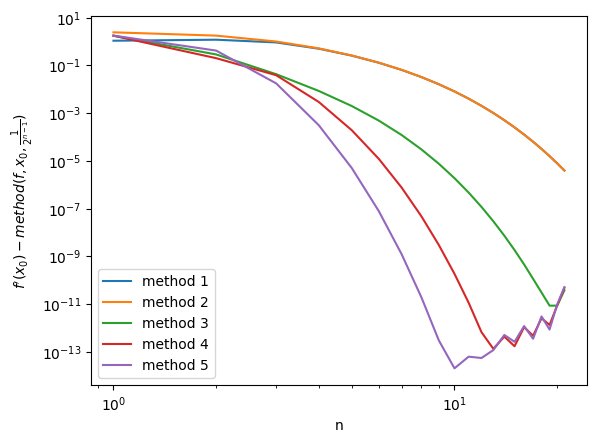

In [33]:
def f(x):
    return sin(x * x)

def fd(x):
    return 2 * x * cos(x * x)

evaluate(f, fd)

### $f(x) = \cos(\sin(x))$

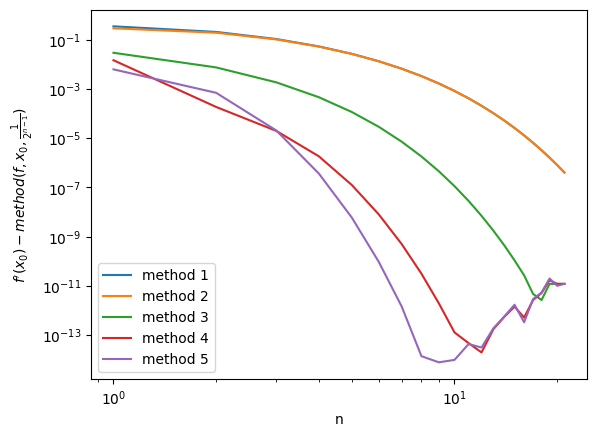

In [34]:
def f(x):
    return cos(sin(x))

def fd(x):
    return - sin(sin(x)) * cos(x)

evaluate(f, fd)

### $f(x) = \exp(\sin(\cos(x)))$

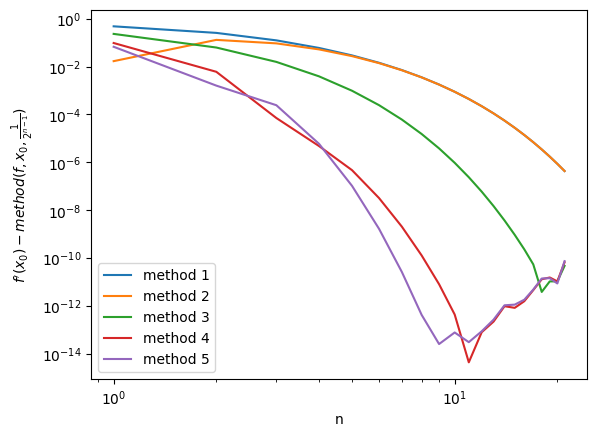

In [35]:
def f(x):
    return exp(sin(cos(x)))

def fd(x):
    return - cos(cos(x)) * sin(x) * f(x)

evaluate(f, fd)

### $f(x) = \log(x + 3)$

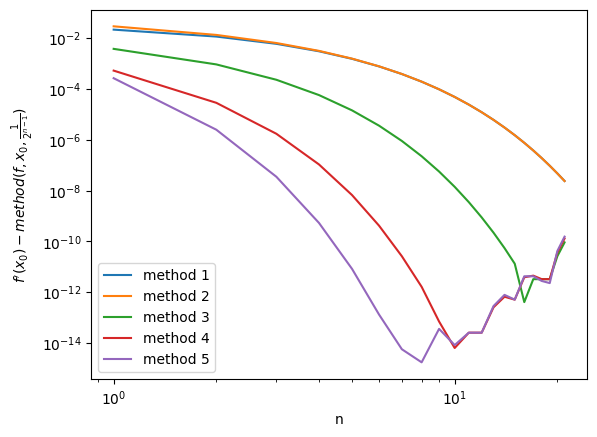

In [36]:
def f(x):
    return log(x + 3)

def fd(x):
    return 1 / (x + 3)

evaluate(f, fd)

### $f(x) = \sqrt{x + 3}$

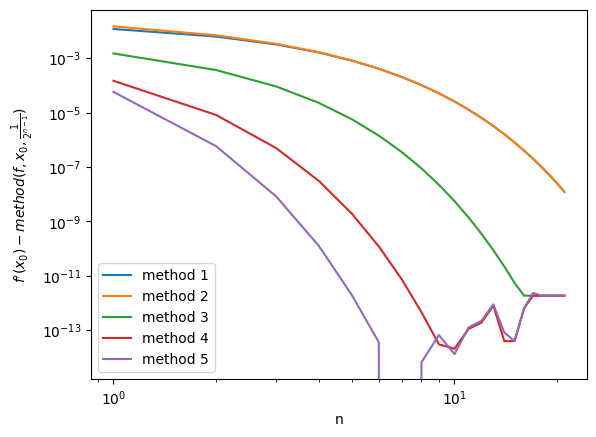

In [37]:
def f(x):
    return sqrt(x + 3)

def fd(x):
    return 1/2 / f(x)

evaluate(f, fd)